# Use Jupyter Notebook with an SPARQL endpoint

This Jupyter Notebook explores how to interact with the eProcurement Open Data endpoint using Python and SPARQL. By leveraging the querying capabilities of SPARQL and the powerful analytical features of pandas DataFrames, you can gain valuable insights from eProcurement notices.

## Running this notebook

First install Jupyter Notebook in your Python environment. This can be done using the pip package manager with the following command:

```sh
pip install notebook
```

When installed, Open your command prompt or terminal, navigate to the directory where you want to store your notebook, and run the following command:

```sh
jupyter notebook
```

In [1]:
### Installing the dependencies

!pip install sparqldataframe
!pip install pandas

## SPARQL endpoint

The data of Notices is available through the [SPARQL endpoint](https://publications.europa.eu/webapi/rdf/sparql)  of the Publications Office. You can use it to access and analyze data without the need of downloading all Notices

## Example

Python offers several libraries to interact with SPARQL endpoints. This example utilizes `sparqldataframe` for querying the endpoint, fetching results directly into a pandas Dataframe for further analysis.

The following is a query that counts all the notices published in certain date, in this case "20230911"


In [2]:
import sparqldataframe

In [3]:
counts = sparqldataframe.query("https://publications.europa.eu/webapi/rdf/sparql",""" 
PREFIX epo: <http://data.europa.eu/a4g/ontology#>

SELECT (COUNT(?Notice) AS ?NoticeCount) 
WHERE {
    ?Notice a epo:Notice ;
            epo:hasPublicationDate "20230911" .
}""")    


The data is now contained in a dataframe, with one element

In [4]:
counts.head()

,NoticeCount
0,1187


Let's move into a more complex example. 


This query gathers retrieves details from eProcurement notices published between September 1 and September 10, 2023. It extracts the legal names of buyers, their countries, and the awarded values for each related lot.


In [5]:
import sparqldataframe

sparql_query = """
PREFIX epo: <http://data.europa.eu/a4g/ontology#>
PREFIX cccev: <http://data.europa.eu/m8g/>
PREFIX org: <http://www.w3.org/ns/org#>

SELECT DISTINCT
?pubDate
?CountryLabel
?LegalName
?AwardedValue
?Currency
WHERE {
    ?Notice epo:hasPublicationDate ?pubDate ;
            epo:announcesRole [
                a epo:Buyer ;
                epo:playedBy [
                    cccev:registeredAddress [epo:hasCountryCode ?CountryCode]  ;
                    epo:hasLegalName ?LegalName 
                ] 
            ] ;
            epo:refersToLot ?Lot .

    ?LotAwardOutcome epo:describesLot ?Lot ;
                     epo:hasAwardedValue [
                        epo:hasAmountValue ?AwardedValue ;
                        epo:hasCurrency ?Currency
                     ] .
  		?CountryCode skos:prefLabel ?CountryLabel .
      FILTER(lang(?CountryLabel) = "en")
      FILTER(xsd:date(?pubDate) >= xsd:date("20230901") && xsd:date(?pubDate) <= xsd:date("20230910"))
}

"""
df = sparqldataframe.query(
  "https://publications.europa.eu/webapi/rdf/sparql",
  sparql_query)

In [6]:
df.head()

,pubDate,CountryLabel,LegalName,AwardedValue,Currency
0,20230901,Germany,"Deutsche Rentenversicherung Baden-Württemberg,...",1,http://publications.europa.eu/resource/authori...
1,20230901,Germany,"Wasser- und Abwasserzweckverband ""Elbe-Elster-...",200000,http://publications.europa.eu/resource/authori...
2,20230901,Germany,Gemeinde Scharbeutz,2000000,http://publications.europa.eu/resource/authori...
3,20230901,France,Société SAPN,393760,http://publications.europa.eu/resource/authori...
4,20230901,France,cci Pays de la Loire,480000,http://publications.europa.eu/resource/authori...


Some statistics of this data frame:

In [7]:
df.describe()

,pubDate,CountryLabel,LegalName,AwardedValue,Currency
count,33657,33657,33657,33657,33657
unique,6,41,5227,20268,17
top,20230901,Romania,Spital Clinic Judetean de Urgenta Arad,0.01,http://publications.europa.eu/resource/authori...
freq,9588,14712,1475,347,14373


The distribution of countries in this dataframe:

<Axes: xlabel='CountryLabel'>

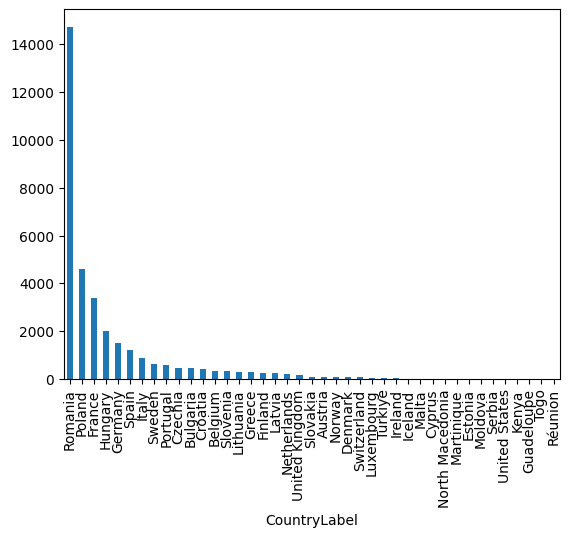

In [8]:
df['CountryLabel'].value_counts().plot(kind='bar')

## Conclusion


As demonstrated, it is direct to integrate the values from a SPARQL endpoint into a DataFrame, unlocking the rich functionality of pandas to analyze data. 